## Plots functional form of ZM convection area based on mass flux and dp1 dp2 values

In [128]:
import xarray as xr
#import seaborn as sb
import numpy as np
import matplotlib.pyplot as mp

In [129]:
# dp1 is a constant with heigh
# dp2 is a functional form of 

dp1_0 = 0.2
dp2 = np.arange(100.,1000.,20.) 
frac_max = 0.6

    
    

In [132]:
# Read in data for a typical column of ZM mass flux.

run_name = "b.e23_alpha16b.BLT1850.ne30_t232.036"
dir_name = "/glade/derecho/scratch/hannay/archive/"+run_name+"/atm/hist/"

#run_name = "f.e21.F2000climo.f19_f19.cesm2_1.zmke.000"
#dir_name = "/glade/scratch/rneale/archive/"+run_name+"/atm/hist/"

cam_file = dir_name+run_name+".cam.h0.0008-01.nc"

cam_ds = xr.open_dataset(cam_file).squeeze()

ix = 120
iy = 100

#ix = 60
#iy = 50

var_mf = 'CMFMC_DP'
#var_mf = 'ZMMU'
cam_gp = cam_ds[var_mf][:,iy,ix]
print(cam_gp)
cam_gp = cam_gp.values

print(cam_gp)


<xarray.DataArray 'CMFMC_DP' (ilev: 59)>
[59 values with dtype=float32]
Coordinates:
    lat      float64 4.241
    lon      float64 150.0
  * ilev     (ilev) float64 2.055 3.98 6.909 11.27 ... 979.0 987.4 995.1 1e+03
    time     object 0008-02-01 00:00:00
Attributes:
    mdims:         4
    units:         kg/m2/s
    long_name:     Convection mass flux from ZM deep
    cell_methods:  time: mean
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.2894491e-05 4.7028414e-05
 1.7052975e-04 2.8606411e-04 3.9890673e-04 5.6387216e-04 6.4691412e-04
 7.0258655e-04 7.6282548e-04 8.3650899e-04 9.1483782e-04 9.1993343e-04
 1.0697902e-03 1.1609759e-03 1.2666427e-03 2.0611193e-03 4.1561541e-03
 6.4668539e-03 7.7759456e-03 8.8223703e-03 8.5330866e-03 8.5333819e-03
 8.9307409e-03 9.0806754e-03 9.

<xarray.DataArray (level: 59, dp2: 45)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01085147, 0.01295286, 0.0150324 , ..., 0.08428199, 0.08573997,
        0.08718741],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
  * level    (level) float64 2.055 3.98 6.909 11.27 ... 979.0 987.4 995.1 1e+03
  * dp2      (dp2) float64 100.0 120.0 140.0 160.0 ... 920.0 940.0 960.0 980.0


<a list of 24 text.Text objects>

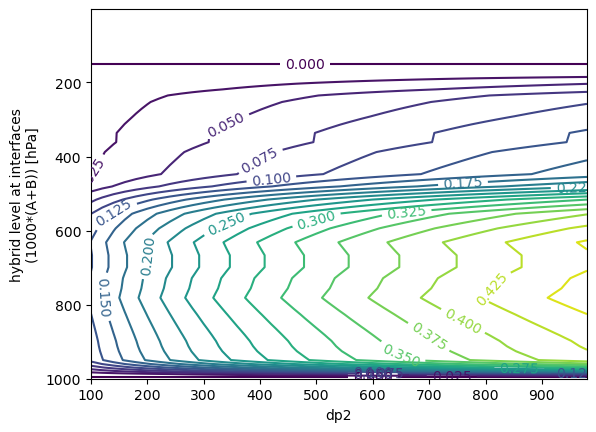

In [133]:
# Calculate deep fraction from dp1, dp2 and mass flux.    

deep_cu = np.zeros([cam_gp.size,dp2.size])
#print(deep_cu)

for idp,dp2_i in enumerate(dp2):
    for imf,zm_mf in enumerate(cam_gp):
        dp_temp1 = dp1_0*np.log(1.0+dp2_i*zm_mf) 
        
#        print(dp2_i)
#        print(zm_mf)
        dp_temp1 = np.max([0.0,dp_temp1])
        dp_temp1 = np.min([dp_temp1,frac_max])
        deep_cu[imf,idp] = dp_temp1
                      
deep_cu_da = xr.DataArray(deep_cu,coords=[cam_ds.ilev,dp2],dims=['level','dp2'])
              
print(deep_cu_da)
fig, ax = mp.subplots()

cc = deep_cu_da.plot.contour(yincrease=False,levels=20,ax=ax)
ax.clabel(cc)